# Import, options

In [61]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [62]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [63]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [64]:
#data DEseq HEK293
df_GExp = pandas.read_csv(file_directory+'1) input/HEK293_temp_DESeq.csv',
                               sep = ',')
print(df_GExp.shape, '\n', df_GExp.columns)

# select columns and rename
columns = ['log2FoldChange','pvalue','gene']
df_GExp = df_GExp[columns]
df_GExp = df_GExp.rename(columns = {'log2FoldChange' : 'FC (GEx)',
                                    'pvalue' : 'pvalue(Gex)',
                                    'gene' : 'SYMBOL'})
df_GExp.head()

(216, 14) 
 Index(['Row.names', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'gene', '37deg', '37deg.1', '37deg.2', '32deg', '32deg.1',
       '32deg.2'],
      dtype='object')


,FC (GEx),pvalue(Gex),SYMBOL
0,1.851678,4.502988e-29,SRSF5
1,1.667631,1.407973e-16,FANCB
2,-1.511831,1.183722e-12,AC011043.1
3,1.128752,3.366582e-10,FAM110D
4,3.506025,4.291237e-10,HIST1H3E


In [65]:
#data hNPC all H3K36me3
df_H3K36me3 = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_allPeaks_max20_MACS3.csv',
                               sep = ',')

# select columns
columns = ['SYMBOL','Fold','p.value','annotation']
print(df_H3K36me3.shape)
df_H3K36me3[columns].head(5)

(17794, 25)


,SYMBOL,Fold,p.value,annotation
0,CREBL2,-20.405148,1.764480e-20,Promoter (1-2kb)
1,PCCA,-19.528880,2.116609e-18,"Intron (ENST00000376279.7/5095, intron 19 of 22)"
2,ZNF83,-19.227747,1.512751e-16,"Intron (ENST00000702778.1/ENST00000702778.1, i..."
3,EMBP1,-18.824480,9.374397e-16,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,5' UTR


In [66]:
#data hNPC highest H3K36me3
df_H3K36me3_highest = pandas.read_csv(file_directory+'1) input/from_output/highest_NPC_H3K36me3_MACS3.csv',
                               sep = ',')
print(df_H3K36me3_highest.shape)

# select columns
columns = ['SYMBOL','Fold','p.value']
df_H3K36me3_highest = df_H3K36me3_highest[columns]
df_H3K36me3_highest = df_H3K36me3_highest.rename(columns = {'Fold' : 'FC (H3K36me3)',
                                            'p.value' : 'pvalue(H3K36me3)'})
df_H3K36me3_highest.head()

(37, 4)


,SYMBOL,FC (H3K36me3),pvalue(H3K36me3)
0,CREBL2,-20.405148,1.764480e-20
1,PCCA,-19.528880,2.116609e-18
2,ZNF83,-19.227747,1.512751e-16
3,EMBP1,-18.824480,9.374397e-16
4,NRP1,-18.894174,1.186074e-15


# I] Do the genes that experience the most significant loss of H3K36me3 at 32°C overlap with the differentially expressed genes (DEGs) in HEK293 cells?

In [67]:
print(df_GExp.shape, df_H3K36me3_highest.shape)

# see what are the commun genes
merged_df = pandas.merge(df_H3K36me3_highest, df_GExp, on='SYMBOL', how='inner')

print(merged_df.shape)

(216, 3) (37, 3)
(0, 5)


#### The gene which loss the most H3K36me at 32°C are not in the DEG genes of HEK293.

# II] What H3K36me3 differences of the differentially expressed genes in HEK293 cells at 32°C?

In [68]:
#volcano plot
df_H3K36me3_andDEG = df_H3K36me3[df_H3K36me3['SYMBOL'].isin(df_GExp['SYMBOL'].values)]
df_H3K36me3_andDEG.reset_index(drop=True, inplace=True)
size_total = len(df_H3K36me3_andDEG)
number_gene = len(df_H3K36me3_andDEG.drop_duplicates(subset = "SYMBOL"))

print(size_total, number_gene)

238 102


####  102 genes are differentially expressed \n and have different H3K36me3 at 32°C. Several mutations per gene, so 238 points


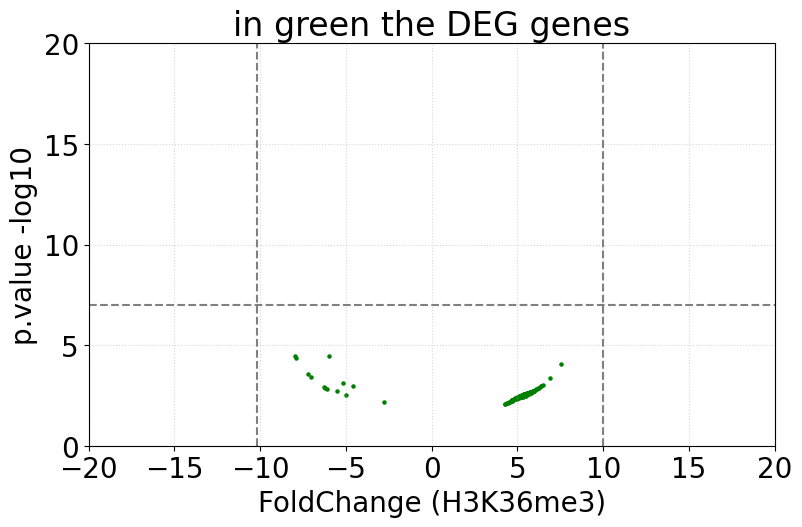

In [69]:
#volcano plot colors based on HEK293 GEx
plt.scatter(x=df_H3K36me3_andDEG['Fold'],
            y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)),
            s=5, c='green')
plt.tight_layout()

plt.title("in green the DEG genes")
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_pos_negDEG'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [71]:
# to sort with colors the +DEG and -DEG
df_H3K36me3_andDEG_po_neg = pandas.merge(df_H3K36me3_andDEG, df_GExp, on='SYMBOL', how='left')
print(len(df_H3K36me3_andDEG_po_neg))

# Chech up duplicate are ok (= H3K36me3 different but same GExp data)
df_H3K36me3_andDEG_po_neg[df_H3K36me3_andDEG_po_neg["SYMBOL"] =='CEP83']


238


,seqnames,start,end,width,strand,width.1,strand.1,Conc,Conc_32,Conc_37,...,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME,FC (GEx),pvalue(Gex)
2,chr12,94377781,94378180,400,*,401,*,6.846523,0.000000,7.846523,...,22330,2,51134,ENST00000551250.1,22941,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
16,chr12,94421505,94421904,400,*,401,*,5.557848,0.000000,6.557848,...,9535,2,51134,ENST00000551596.1,-8993,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
86,chr12,94312048,94312447,400,*,401,*,5.202027,6.202027,0.000000,...,4352,2,51134,ENST00000546783.1,731,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
122,chr12,94343082,94343481,400,*,401,*,4.984000,5.984000,0.000000,...,4163,2,51134,ENST00000546587.1,-7234,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
163,chr12,94391280,94391679,400,*,401,*,4.923560,5.923560,0.000000,...,22330,2,51134,ENST00000551250.1,9442,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
171,chr12,94423411,94423810,400,*,401,*,4.506970,5.506970,0.000000,...,9535,2,51134,ENST00000551596.1,-10899,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194
219,chr12,94286944,94287343,400,*,401,*,4.018549,5.018549,0.000000,...,3026,2,51134,ENST00000547927.1,-4100,ENSG00000173588,CEP83,centrosomal protein 83,-1.10805,0.000194


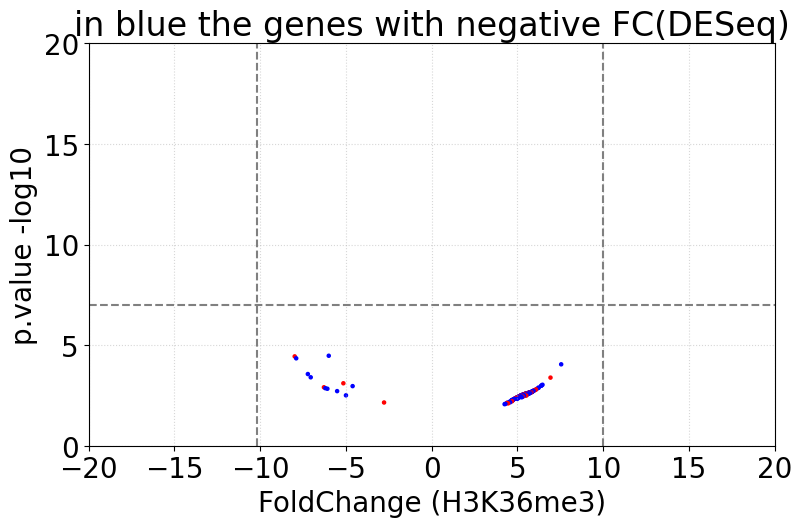

In [72]:
#volcano plot colors based on HEK293 GEx
colors = ['blue' if x < 0
          else 'red' if x > 0 
          else 'grey' for x in df_H3K36me3_andDEG_po_neg['FC (GEx)']]

plt.scatter(x=df_H3K36me3_andDEG_po_neg['Fold'],
            y=df_H3K36me3_andDEG_po_neg['p.value'].apply(lambda x:-numpy.log10(x)),
            s=5, c=colors)
plt.tight_layout()
plt.title('in blue the genes with negative FC(DESeq)')
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")


title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_pos_negDEG'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [73]:
blue_indices = [symbol for symbol, color in zip(df_H3K36me3_andDEG['SYMBOL'], colors) if color == 'blue']
red_indices = [symbol for symbol, color in zip(df_H3K36me3_andDEG['SYMBOL'], colors) if color == 'red']

In [74]:
blue_genes_n = len(set(blue_indices))
red_genes_n = len(set(red_indices))

In [75]:
print(f'{len(blue_indices)} points for {red_genes_n} genes with negative FC(DESeq) and {len(red_indices)} points for {blue_genes_n} genes with a positive one')

155 points for 50 genes with negative FC(DESeq) and 83 points for 52 genes with a positive one


In [76]:
# Check up to see if its true (we see, red_3blues_red_4blues_red)
df_ctl = df_H3K36me3_andDEG_po_neg[ (df_H3K36me3_andDEG_po_neg['Fold'] < 1) ]
df_ctl = df_ctl[['SYMBOL', 'Fold', 'FC (GEx)']]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,FC (GEx)
1,CUTC,-7.980953,0.722293
2,CEP83,-7.893210,-1.108050
4,TNRC6B,-7.214020,-0.789301
5,SLMAP,-7.047436,-0.821961
12,ATR,-6.277242,0.992642
15,SACM1L,-6.193535,-0.804091
16,CEP83,-6.076300,-1.108050
0,CBLB,-5.995856,-1.143240
24,RSRP1,-5.507873,-1.211194
7,BRAF,-5.143708,0.711966


# Classification by annotation

In [17]:
df_H3K36me3_andDEG.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'width.1', 'strand.1',
       'Conc', 'Conc_32', 'Conc_37', 'Fold', 'p.value', 'FDR', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME'],
      dtype='object')

In [23]:
#to see the different kind of annotation 
set(df_H3K36me3_andDEG.annotation)

{"3' UTR",
 "5' UTR",
 'Distal Intergenic',
 'Downstream (<=300bp)',
 'Exon (ENST00000279873.12/84159, exon 7 of 10)',
 'Exon (ENST00000317147.10/23019, exon 5 of 49)',
 'Exon (ENST00000317147.10/23019, exon 7 of 49)',
 'Exon (ENST00000330753.6/23768, exon 2 of 2)',
 'Exon (ENST00000342016.8/9541, exon 10 of 10)',
 'Exon (ENST00000367509.8/6045, exon 4 of 6)',
 'Exon (ENST00000367510.8/6045, exon 4 of 7)',
 'Exon (ENST00000372409.8/63935, exon 5 of 17)',
 'Exon (ENST00000438423.6/6938, exon 17 of 21)',
 'Exon (ENST00000510960.5/55299, exon 6 of 6)',
 'Exon (ENST00000525031.2/ENST00000525031.2, exon 1 of 1)',
 'Exon (ENST00000558908.5/6938, exon 4 of 6)',
 'Exon (ENST00000604318.1/ENST00000604318.1, exon 1 of 1)',
 'Exon (ENST00000648542.1/127396, exon 6 of 6)',
 'Exon (ENST00000656582.1/545, exon 7 of 7)',
 'Intron (ENST00000258526.9/10154, intron 23 of 30)',
 'Intron (ENST00000261263.5/23011, intron 4 of 6)',
 'Intron (ENST00000262189.11/58508, intron 6 of 58)',
 'Intron (ENST00000262

In [24]:
# create a function to simplufy the annotation
def get_annotation_category(annotation):
    if annotation.startswith('Intron'):
        return 'Intron'
    elif annotation.startswith('Exon'):
        return 'Exon'
    elif annotation.startswith('Promoter'):
        return 'Promoter'
    else:
        return annotation

## All genes

In [32]:
df_H3K36me3 = df_H3K36me3.assign(Annotation = df_H3K36me3['annotation'].apply(get_annotation_category))
df_H3K36me3 = df_H3K36me3[['SYMBOL', 'Fold', 'p.value', 'FDR', 'Annotation']]
print(set(df_H3K36me3.Annotation), '\n')

df_H3K36me3['Annotation'] = df_H3K36me3['Annotation'].str.strip()
df_H3K36me3

{"5' UTR", "3' UTR", 'Promoter', 'Downstream (<=300bp)', 'Distal Intergenic', 'Exon', 'Intron'} 



,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
3,EMBP1,-18.824480,9.374397e-16,2.245645e-11,Distal Intergenic
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
...,...,...,...,...,...
17789,EYA1,4.209499,9.027092e-03,4.996032e-02,Intron
17790,IFFO2,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17791,LOC728739,4.218131,9.029145e-03,4.996326e-02,Distal Intergenic
17792,LSAMP,4.218131,9.029145e-03,4.996326e-02,Intron


In [33]:
df_H3K36me3.Annotation.value_counts()

Annotation
Intron                  8536
Promoter                5233
Distal Intergenic       1789
Exon                    1081
3' UTR                  1068
5' UTR                    72
Downstream (<=300bp)      15
Name: count, dtype: int64

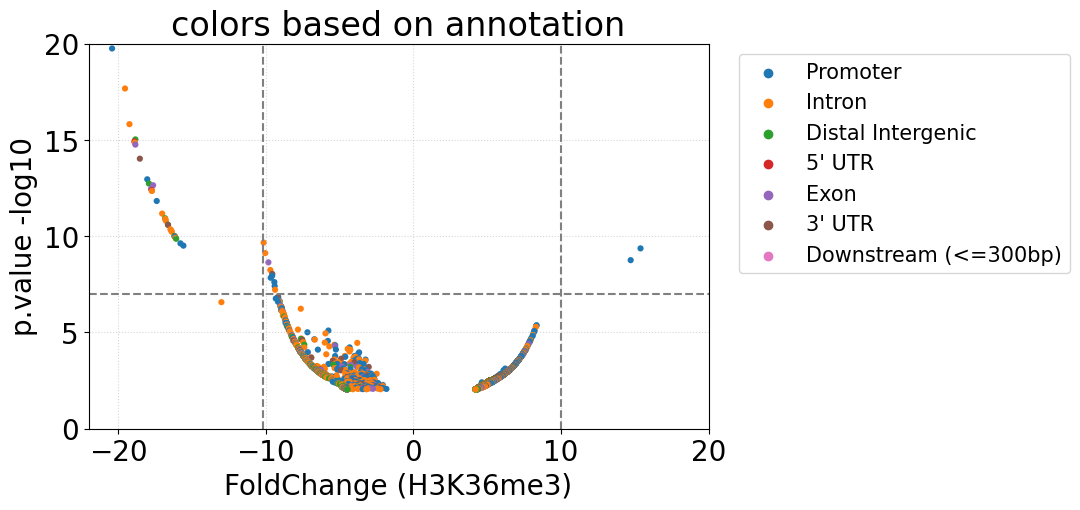

In [40]:
seaborn.scatterplot(data=df_H3K36me3, x=df_H3K36me3['Fold'], 
                    y=df_H3K36me3['p.value'].apply(lambda x:-numpy.log10(x)), 
                    s=20, edgecolor='none', hue="Annotation")

plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1), fontsize='15')

plt.title('All genes, colors based on annotation')
plt.ylim(0, 20)
plt.xlim(-22, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_all_annotation'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [37]:
# Check up to see if its true (yes, the colors fit to the annotation)
df_ctl = df_H3K36me3[ (df_H3K36me3['Fold'] < 1) ]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,p.value,FDR,Annotation
0,CREBL2,-20.405148,1.764480e-20,1.738648e-15,Promoter
1,PCCA,-19.528880,2.116609e-18,1.042811e-13,Intron
2,ZNF83,-19.227747,1.512751e-16,4.968680e-12,Intron
4,NRP1,-18.894174,1.186074e-15,2.245645e-11,5' UTR
5,LINC01927,-18.870846,1.367406e-15,2.245645e-11,Intron
...,...,...,...,...,...
16270,STAT1,-2.102012,5.771308e-03,3.493495e-02,Intron
15895,KPNB1,-2.065600,5.316754e-03,3.294709e-02,Promoter
16624,SNORD94,-2.059913,6.315468e-03,3.741325e-02,Intron
17268,PCBP2,-2.051993,7.704129e-03,4.393137e-02,Promoter


## Only the DEG genes

In [25]:
df_H3K36me3_andDEG = df_H3K36me3_andDEG.assign(Annotation = df_H3K36me3_andDEG['annotation'].apply(get_annotation_category))
df_H3K36me3_andDEG = df_H3K36me3_andDEG[['SYMBOL', 'Fold', 'p.value', 'FDR', 'Annotation']]
print(set(df_H3K36me3_andDEG.Annotation), '\n')

df_H3K36me3_andDEG['Annotation'] = df_H3K36me3_andDEG['Annotation'].str.strip()
df_H3K36me3_andDEG

{"5' UTR", "3' UTR", 'Promoter', 'Downstream (<=300bp)', 'Distal Intergenic', 'Exon', 'Intron'} 



,SYMBOL,Fold,p.value,FDR,Annotation
0,CBLB,-5.995856,0.000034,0.022547,Intron
1,CUTC,-7.980953,0.000036,0.023456,3' UTR
2,CEP83,-7.893210,0.000045,0.027154,Intron
3,PRPF3,7.554051,0.000090,0.027548,Intron
4,TNRC6B,-7.214020,0.000273,0.027548,Intron
...,...,...,...,...,...
233,P4HA1,4.410246,0.007306,0.042029,Promoter
234,RGS4,4.385768,0.007521,0.043100,Distal Intergenic
235,ZNF655,4.462256,0.007837,0.044588,Promoter
236,ATXN2,4.302476,0.008266,0.046605,Intron


In [26]:
df_H3K36me3_andDEG.Annotation.value_counts()

Annotation
Intron                  123
Promoter                 66
3' UTR                   24
Exon                     15
Distal Intergenic         8
5' UTR                    1
Downstream (<=300bp)      1
Name: count, dtype: int64

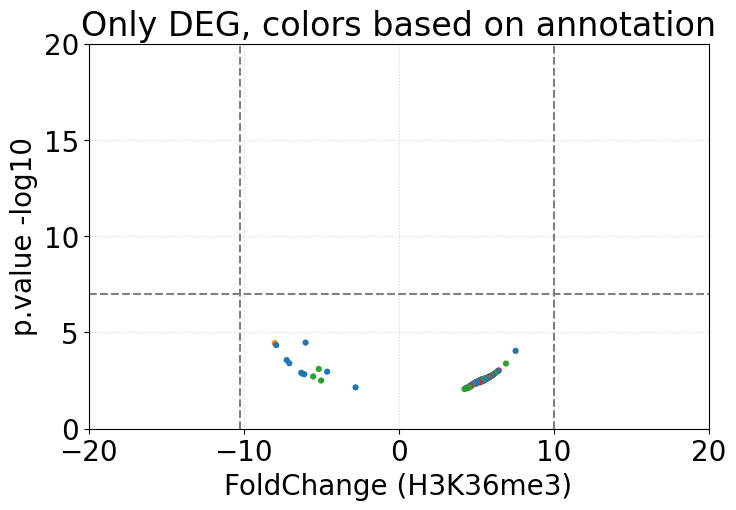

In [41]:
seaborn.scatterplot(data=df_H3K36me3_andDEG, x=df_H3K36me3_andDEG['Fold'], 
                    y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)), 
                    s=20, edgecolor='none', hue="Annotation", legend=False)

plt.title('Only DEG, colors based on annotation')
plt.ylim(0, 20)
plt.xlim(-20, 20)
plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_annotation'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

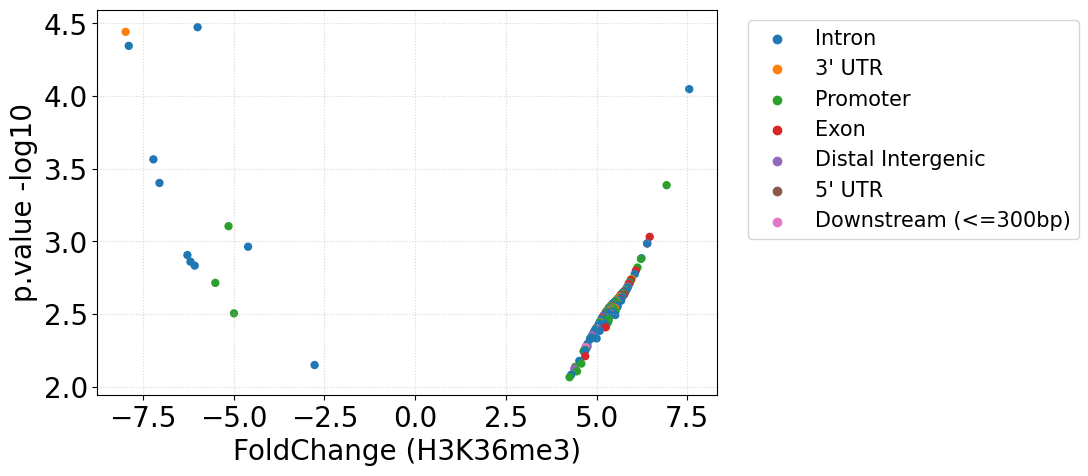

In [31]:
seaborn.scatterplot(data=df_H3K36me3_andDEG, x=df_H3K36me3_andDEG['Fold'], 
                    y=df_H3K36me3_andDEG['p.value'].apply(lambda x:-numpy.log10(x)), 
                    edgecolor='none', hue="Annotation")

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.60, 1), fontsize='15')

plt.xlabel("FoldChange (H3K36me3)")
plt.ylabel("p.value -log10")

title_file = 'volcano_hNPC_H3K36me3_and_HEK293_DEG_annotation_zoom'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

In [30]:
# Check up to see if its true (yes, the colors fit to the annotation)
df_ctl = df_H3K36me3_andDEG[ (df_H3K36me3_andDEG['Fold'] < 1) ]
df_ctl.sort_values('Fold')

,SYMBOL,Fold,p.value,FDR,Annotation
1,CUTC,-7.980953,0.000036,0.023456,3' UTR
2,CEP83,-7.893210,0.000045,0.027154,Intron
4,TNRC6B,-7.214020,0.000273,0.027548,Intron
5,SLMAP,-7.047436,0.000397,0.027548,Intron
12,ATR,-6.277242,0.001242,0.027548,Intron
15,SACM1L,-6.193535,0.001380,0.027548,Intron
16,CEP83,-6.076300,0.001469,0.027548,Intron
0,CBLB,-5.995856,0.000034,0.022547,Intron
24,RSRP1,-5.507873,0.001930,0.027548,Promoter
7,BRAF,-5.143708,0.000786,0.027548,Promoter
